In [41]:
import numpy as np
import pandas as pd
from textblob import TextBlob
from translate import Translator
import matplotlib.pyplot as plt # Graphs & Visualization 
import seaborn as sns

In [5]:
dataset = pd.read_csv(r'C:\Users\sadia\Desktop\LargeScaleProject\Dataset\reviews.csv')

In [6]:
dataset.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2060,158,2008-09-22,2865,Thom,"very nice neighborhood,close enough to ""A"" tra..."
1,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r\nNous avons app...
2,2595,19176,2009-12-05,53267,Cate,Great experience.
3,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
4,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."


In [7]:
sampleData=dataset.sample(n=10000)
sampleData=sampleData.dropna()

In [8]:
sampleData.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
376025,5717355,497633664,2019-07-28,1696099,Ian,Thank you again so much! Easy stay and good co...
732316,16364067,458970370,2019-05-26,14181860,Rachel,"Great location, stylish space, fun neighborhood"
730143,16320612,176726140,2017-07-31,18950739,Tracy,"Great location! Quiet, near Central Park and s..."
72982,299531,77019179,2016-05-30,9464853,Kwame,"Wonderful space that is, admittedly, a good wa..."
988989,23905099,477054945,2019-06-27,115863056,Lindsay,We had a lovely stay at Micah’s home! You can’...


In [9]:
inputData = sampleData.iloc[:,-1].values
inputData.item(0)

'Thank you again so much! Easy stay and good communication with a perfect price point'

In [10]:
import re
import html.parser
def clean_data(textData):
    textData = re.sub(r'[?|$|.|!|\n|;|-|,|:|\d+]',r'',textData)
    textData = html.parser.unescape(textData)
    return textData

In [11]:
length = inputData.size
print("Review count",length)
for i in range(0,length):
    inputData[i] = clean_data(inputData.item(i))

Review count 9991


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=53,max_features=50,stop_words='english',ngram_range=(1,1))
feature_matrix = vectorizer.fit_transform(inputData.flatten())
print(feature_matrix.shape)

(9991, 50)


In [31]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters= 5, init='k-means++', random_state=0)
Y_out=model.fit_predict(feature_matrix)


In [35]:
import pandas as pd

X = pd.DataFrame(feature_matrix.toarray(), columns=vectorizer.get_feature_names())
print(X.head())

   amazing  apartment  area  bed  brooklyn     check  city     clean  close  \
0      0.0        0.0   0.0  0.0       0.0  0.000000   0.0  0.000000    0.0   
1      0.0        0.0   0.0  0.0       0.0  0.000000   0.0  0.000000    0.0   
2      0.0        0.0   0.0  0.0       0.0  0.000000   0.0  0.000000    0.0   
3      0.0        0.0   0.0  0.0       0.0  0.000000   0.0  0.000000    0.0   
4      0.0        0.0   0.0  0.0       0.0  0.312263   0.0  0.201495    0.0   

   comfortable  ...  room     space      stay   staying  subway  super  time  \
0          0.0  ...   0.0  0.000000  0.000000  0.000000     0.0    0.0   0.0   
1          0.0  ...   0.0  0.000000  0.000000  0.000000     0.0    0.0   0.0   
2          0.0  ...   0.0  0.000000  0.000000  0.000000     0.0    0.0   0.0   
3          0.0  ...   0.0  0.479925  0.296363  0.000000     0.0    0.0   0.0   
4          0.0  ...   0.0  0.000000  0.370611  0.321062     0.0    0.0   0.0   

   walk  wonderful  york  
0   0.0   0.00000

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9991 entries, 0 to 9990
Data columns (total 51 columns):
amazing         9991 non-null float64
apartment       9991 non-null float64
area            9991 non-null float64
bed             9991 non-null float64
brooklyn        9991 non-null float64
check           9991 non-null float64
city            9991 non-null float64
clean           9991 non-null float64
close           9991 non-null float64
comfortable     9991 non-null float64
definitely      9991 non-null float64
easy            9991 non-null float64
en              9991 non-null float64
et              9991 non-null float64
experience      9991 non-null float64
friendly        9991 non-null float64
good            9991 non-null float64
great           9991 non-null float64
helpful         9991 non-null float64
highly          9991 non-null float64
home            9991 non-null float64
host            9991 non-null float64
just            9991 non-null float64
la              999

In [36]:
X['Cluster'] = Y_out  # Add column corresponding to cluster number
word_frequencies_by_cluster = X.groupby('Cluster').sum()

# To get sorted list for a numbered cluster, in this case 1
#print(word_frequencies_by_cluster.sort_values(by=['amazing']))
#df = word_frequencies_by_cluster.unstack(level=-1)
print(X.head())
word_frequencies_by_cluster=word_frequencies_by_cluster.sort_values(by=['amazing'],ascending=False)
print(word_frequencies_by_cluster)
X['Cluster'] = X['Cluster'].map({0: 1, 2: 2, 1: 3,4:4,3:5})
print(X.head())

   amazing  apartment  area  bed  brooklyn     check  city     clean  close  \
0      0.0        0.0   0.0  0.0       0.0  0.000000   0.0  0.000000    0.0   
1      0.0        0.0   0.0  0.0       0.0  0.000000   0.0  0.000000    0.0   
2      0.0        0.0   0.0  0.0       0.0  0.000000   0.0  0.000000    0.0   
3      0.0        0.0   0.0  0.0       0.0  0.000000   0.0  0.000000    0.0   
4      0.0        0.0   0.0  0.0       0.0  0.312263   0.0  0.201495    0.0   

   comfortable  ...     space      stay   staying  subway  super  time  walk  \
0          0.0  ...  0.000000  0.000000  0.000000     0.0    0.0   0.0   0.0   
1          0.0  ...  0.000000  0.000000  0.000000     0.0    0.0   0.0   0.0   
2          0.0  ...  0.000000  0.000000  0.000000     0.0    0.0   0.0   0.0   
3          0.0  ...  0.479925  0.296363  0.000000     0.0    0.0   0.0   0.0   
4          0.0  ...  0.000000  0.370611  0.321062     0.0    0.0   0.0   0.0   

   wonderful  york  Cluster  
0   0.000000  

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

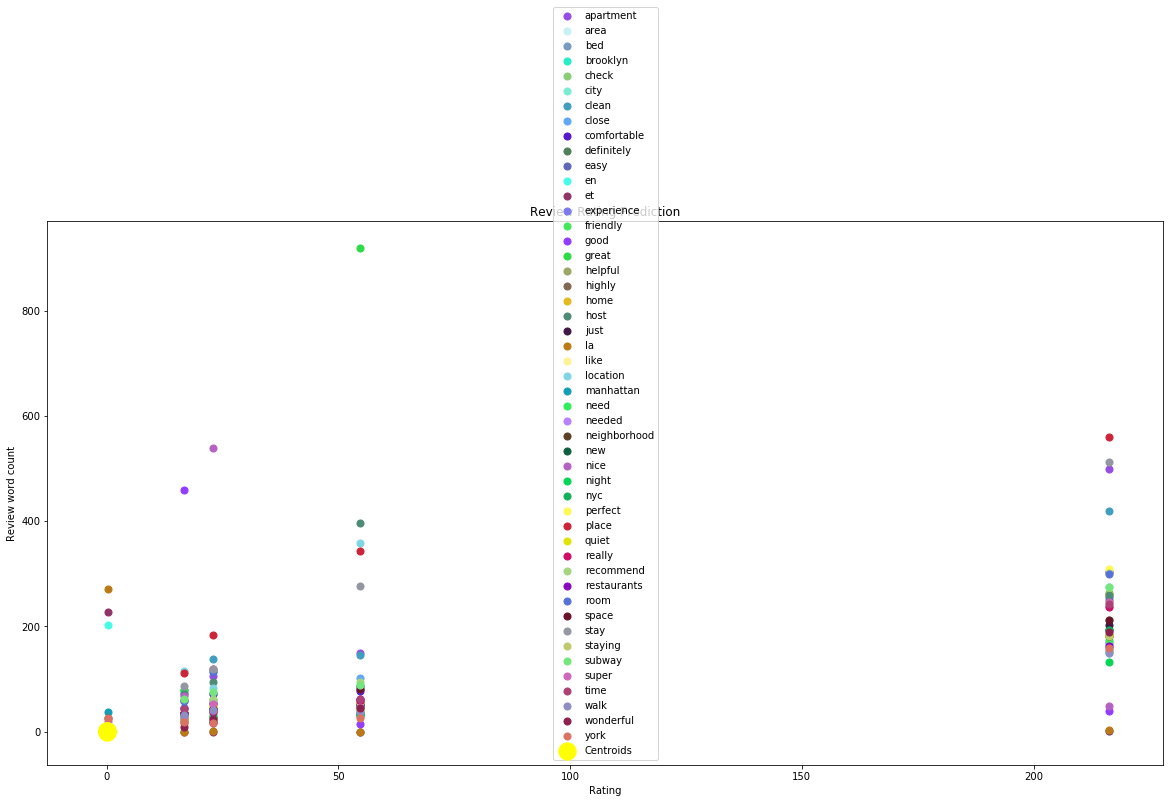

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for j in range(2,51):
    plt.scatter(word_frequencies_by_cluster.iloc[:,0:1].values,word_frequencies_by_cluster.iloc[:,j-1:j].values, s = 50, c = np.random.rand(3,), label =X.columns[j-1])

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Review Rating Prediction')
plt.xlabel('Rating')
plt.ylabel('Review word count')
plt.legend()
plt.show()

<Figure size 576x432 with 0 Axes>

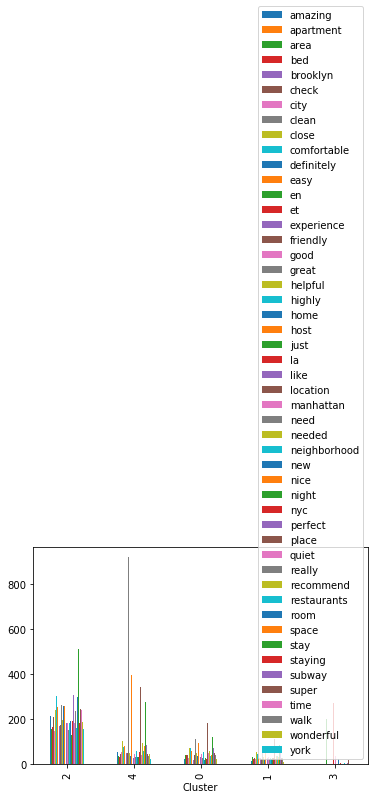

In [47]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
word_frequencies_by_cluster.plot.bar(ylim=0)
plt.show()

<class 'pandas.core.frame.DataFrame'>


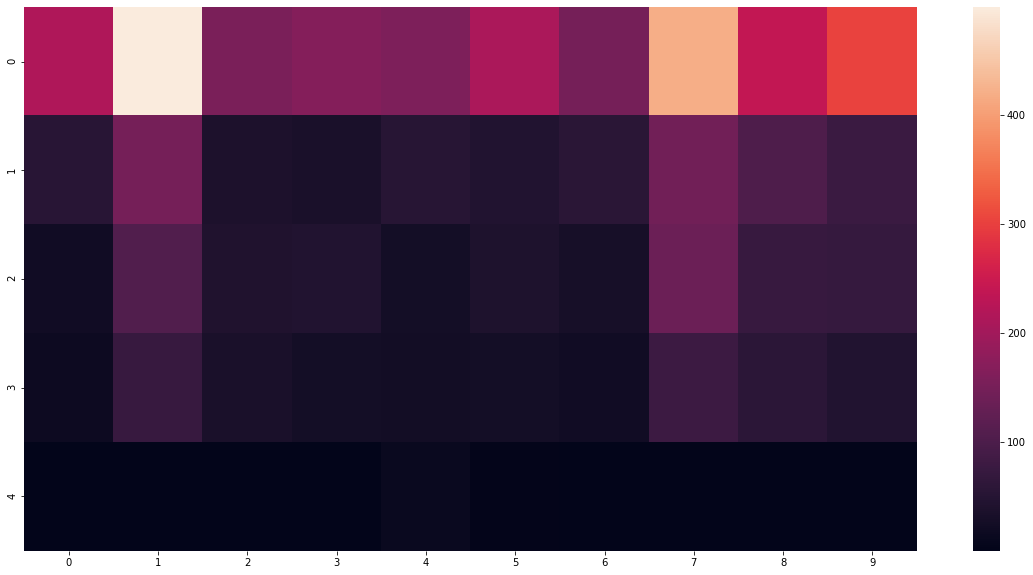

In [48]:

import seaborn as sns
fig = plt.figure(figsize=(20,10))
print(type(word_frequencies_by_cluster))
df = word_frequencies_by_cluster.iloc[:,0:10].values
sns.heatmap(df)
plt.show()

In [38]:
sampleData['Rating']=X.iloc[:,-1:].values
sampleData.head(20)
sampleData.to_csv('generated_rating.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9991 entries, 376025 to 891538
Data columns (total 7 columns):
listing_id       9991 non-null int64
id               9991 non-null int64
date             9991 non-null object
reviewer_id      9991 non-null int64
reviewer_name    9991 non-null object
comments         9991 non-null object
Rating           9991 non-null int64
dtypes: int64(4), object(3)
memory usage: 624.4+ KB
